### `MulitIp`: extend the `ImagePoints` class for better Visualization & Display

Dev-Discussion of proposed feature:

Currently (4.23) submitting class without tests or documentation. The cells in demonstration section will be used as the basis for documentation in the docs_src/vision.image.ipynb

**Major Features & Rationale**
Currently, multiple points can be plotted, and they can use any styling available to matplotlib. But we can't use separate styles for different points on the same image. 

This can be confusing because we might want to plot points for two models and compare results and we can't tell which point point correspond to which model, or because there are multiple points that correspond to semanitacally different features (e.g. nose-tip, mouth-left, mouth-right, etc) and it's unclear which point is supposed to correspond to which feature. 

This class allows us to:

 - Plot points with different styles: useful for comparing the prediction output of two models.
 
 - Label points via labels or legend: useful for differentiating the semantics of points.

**Concise Example**

    # create: img, ip1, ip2
    universal_params = {'marker':'o', 's':100}
    mip = MultiIp(list_ips=[ip1, ip2], 
                  list_params=[{'c':'y', **universal_params, },
                               {'c':'r', **universal_params, }])
    # display ip1 points as yellow and ip2 points as red
    img.show(y=mip)

**Class Design**

Tradionally, `Image.show`is passed an `ImagePoints` object for its `y` argument to plot point[s] on an image. That method uses the following line:

    if y is not None: y.show(ax=ax, **kwargs)
    
So, `MultiIP` also has `show` method which will be called when passed in. But it's capable of more functionality, its display options are initialized in construction, before / outside `Image.show` and it can handle all previous functionality through sharing the same arguments and passing kwargs.

With this design, MultiIP allows lots of functionality extension without interfering with or changing any existing objects.

**Why not use ImageBBox?**

There are many domains where we predict multiple points but these are not described well by a box: facial points, pose points, and (biological) within cell site-labelling points are examples. The example in this notebook is simply a rectangle which has been converted to a polygon by photographic perspective. These are all better suited as sets of image points rather than boxes or segments.

ImageBBox has a label feature simlar to MultiIP but ImageBBox lacks modification for coloring, marker-shape, and lacks the ability to pass in distinct arbitrary parameters to the underlying matplotlib in order to customize their visualization to their task.

In [1]:
import os, sys
sys.path.insert(0, '../../../fastai/')

import fastai
print(fastai.__version__)

import numpy as np
from fastai.vision import *

# from modules.ap3graph import MultiIp
from fastai.vision.image import MultiIp

%reload_ext autoreload
%autoreload 2

1.0.52.dev0


In [1]:
'''
TODO
[ ] add to __all__  export list
[ ] rename notebook to vision.image.multiip.ipynb per: https://github.com/fastai/fastai/tree/master/docs_src
    - goes in a vision.image subsection or a separate module like callbacks.csvlogger
[ ] typing on the class
[ ] better doc string on class
    [ ] list_ips format
    [ ] add example-notebook's path to class doc string
[ ] formatting: to vision.image module standards
[ ] testing
Notes
 - if i go outside of vision.image.py, i can have my own coding style, otherwise to rigidly match theirs
 - look at plot_multi, etc to see if existing functionality is duplicated -> no, plot_multi does a grid of outputs
 - there is already an image of faces in docs
 - you can put init arg notes in docu, see vision.image.ipynb section for:
    show_doc(Image.show, arg_comments ={
       'ax': 'matplotlib.pyplot axes on which show the image',...
'''
pass

### Create Input Objects
These objects are re-created from actual outputs from two learners trained on this dataset:

pred_pts1 - represent transformed output of learner1.predict(img), and

pred_pts2 - represent the same from learner2

These hard-coded values allow you to run the example in this notebook for a visualization.

In [2]:
img = open_image('img_gate_small.jpg')
size = (288, 432)
img2 = img.clone()
_ = img2.resize(size=(3,*size))

def get_ip(img,pts): 
    ''' from dl1-lesson3-camvid'''
    return ImagePoints(FlowField(img.size, pts), scale=True, y_first=True)

pred_pts1 = tensor([[ 74.5809, 109.6926],
                    [ 78.6673, 238.8884],
                    [203.9195, 230.4293],
                    [196.1395,  96.6065]])
pred_pts2 = tensor([[ 67.2359, 116.2628],
                    [ 67.3061, 259.2588],
                    [210.8090, 258.1133],
                    [210.9947, 109.6959]])

ip1 = get_ip(img, pred_pts1)
ip2 = get_ip(img, pred_pts2)

In [3]:
print(ip1, ip1.data, ip2, ip2.data, sep='\n')

ImagePoints (864, 1296)
tensor([[-0.8274, -0.8307],
        [-0.8179, -0.6313],
        [-0.5280, -0.6444],
        [-0.5460, -0.8509]])
ImagePoints (864, 1296)
tensor([[-0.8444, -0.8206],
        [-0.8442, -0.5999],
        [-0.5120, -0.6017],
        [-0.5116, -0.8307]])


### Visual Demonstrations

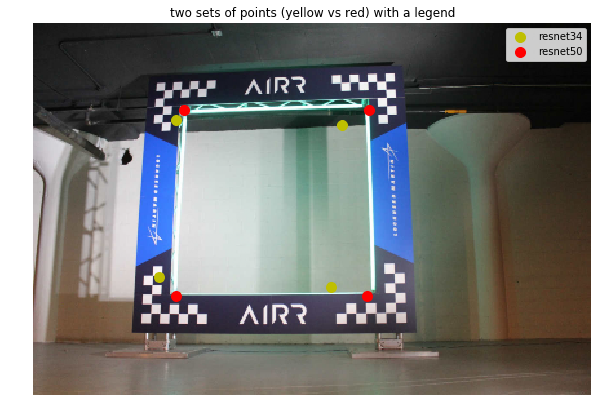

In [4]:
### Different Colors + Legend Example -------------

# build the params that ALL point sets use: 
# here we share marker-shape and size
univ_params = {'marker':'o', 's':100}

mip = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   # combine univ_params with variable
                           {'c':'r', **univ_params, }    # param: color yellow vs red
                          ],
              legend=['resnet34', 'resnet50'],    # use legend to distinguish separate sets of points
            )

# use traditional display method of fastai.Image.show() and pass in MultiIP object as y
img2.show( 
         y=mip
        ,title="two sets of points (yellow vs red) with a legend"
        ,figsize=(10, 10)
        )

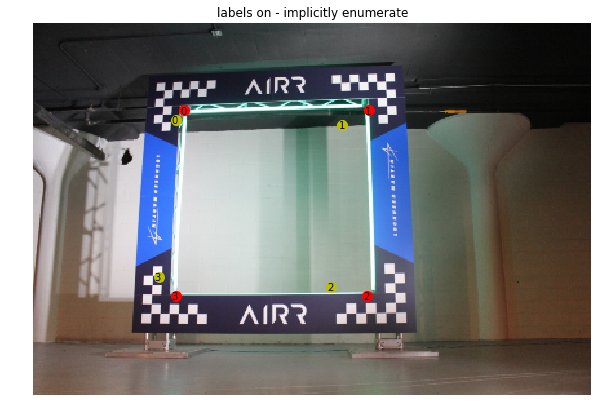

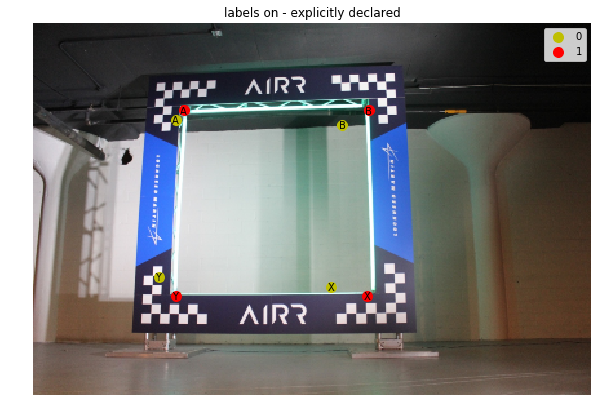

In [40]:
### Labelling Example 1 -----------------------------

univ_params = {'marker':'o', 's':100}

mip1 = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   # different colors correspond to
                           {'c':'r', **univ_params, }    # dinstinct point-sets
                          ],
              legend=False,    # legend off
              labels=True,     # labels-on
              label_enumerate=True,  #labels enumerate by order within their respective IP object
            )

img2.show( 
         y=mip1
        ,title="labels on - implicitly enumerate"
        ,figsize=(10, 10)
        )

### Labelling Example 2 ---------------------------------

univ_params = {'marker':'o', 's':100}    

mip2 = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   
                           {'c':'r', **univ_params, }    
                          ],
              labels=['A','B','X','Y'],             # labels-on: explicitly define
              legend=True,                          # legend on: implicitly strategy of numbering
            )

img2.show( 
         y=mip2
        ,title="labels on - explicitly declared"
        ,figsize=(10, 10)
        )